In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

In [2]:
# Carregar a base de dados de pinguins
penguins = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

In [3]:
# 1. Selecionar as variáveis quantitativas
quantitative_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_quant = penguins[quantitative_vars]

In [4]:
# 2. Eliminar valores faltantes
penguins_clean = penguins_quant.dropna()

In [5]:
# 3. Padronizar as variáveis
scaler = StandardScaler()
penguins_scaled = pd.DataFrame(scaler.fit_transform(penguins_clean), columns=penguins_clean.columns)

In [6]:
# 4. Fazer o agrupamento hierárquico
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(penguins_scaled)

AgglomerativeClustering(n_clusters=3)

In [7]:
# Adicionar os rótulos dos clusters ao DataFrame
penguins_clean['Cluster'] = clustering.labels_

<ipython-input-7-f35f55db8776>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean['Cluster'] = clustering.labels_


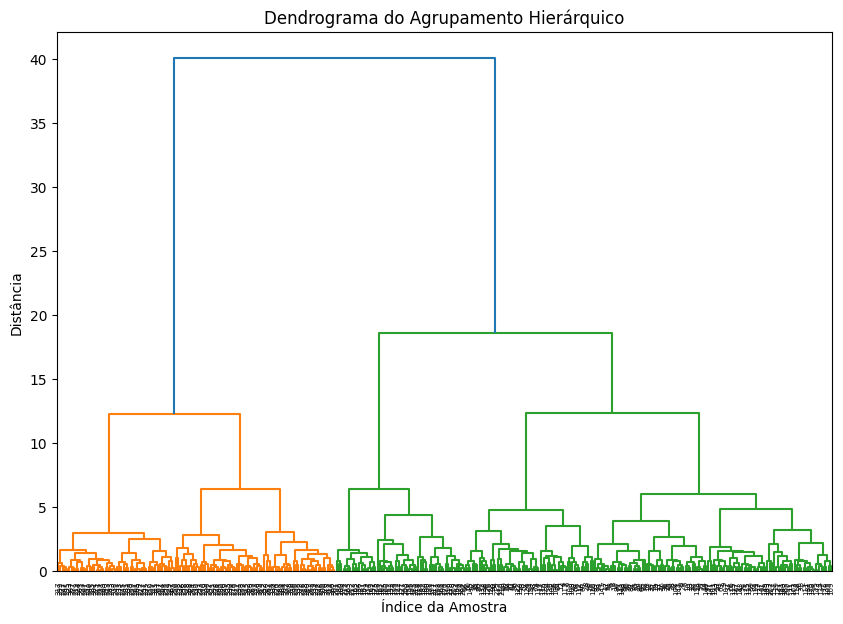

In [8]:
# 5. Fazer o Dendrograma
linkage_matrix = linkage(penguins_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrograma do Agrupamento Hierárquico')
plt.xlabel('Índice da Amostra')
plt.ylabel('Distância')
plt.show()


In [9]:
# Visualizar os resultados
print(penguins_clean.groupby('Cluster').mean())

         bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
Cluster                                                               
0             39.150000      18.287654         189.901235  3675.771605
1             47.504878      14.982114         217.186992  5076.016260
2             49.752632      18.601754         197.105263  3810.087719


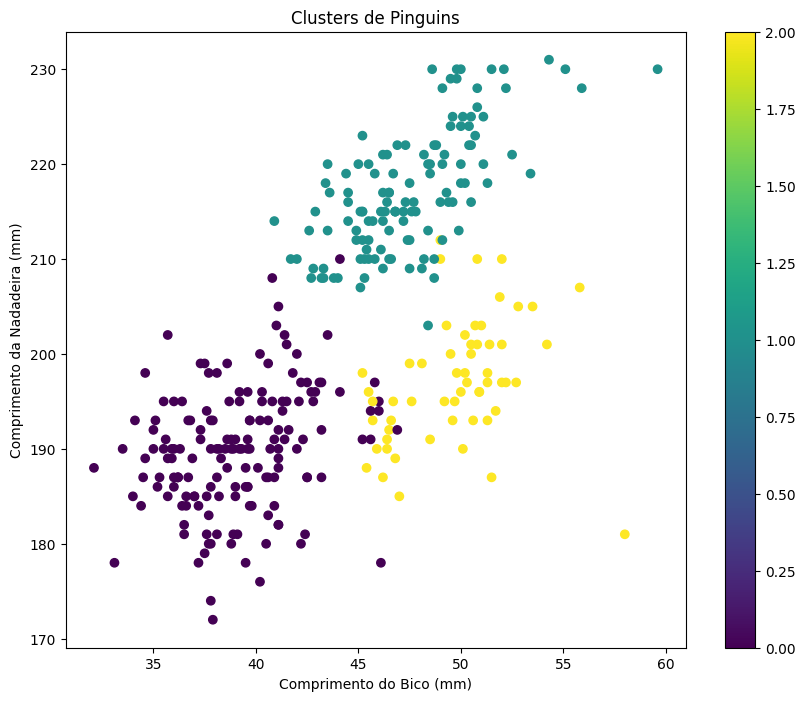

In [10]:
# Gráfico de dispersão para visualizar os clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(penguins_clean['bill_length_mm'],
                      penguins_clean['flipper_length_mm'],
                      c=penguins_clean['Cluster'],
                      cmap='viridis')
plt.xlabel('Comprimento do Bico (mm)')
plt.ylabel('Comprimento da Nadadeira (mm)')
plt.title('Clusters de Pinguins')
plt.colorbar(scatter)
plt.show()

In [11]:
quantitative_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_clean = penguins.dropna()

In [12]:
# Padronizar as variáveis
scaler = StandardScaler()
penguins_scaled = pd.DataFrame(scaler.fit_transform(penguins_clean[quantitative_vars]),
                               columns=quantitative_vars)


In [13]:
# Fazer o agrupamento hierárquico
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters)
penguins_clean['Cluster'] = clustering.fit_predict(penguins_scaled)

<ipython-input-13-90e4e3b52961>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean['Cluster'] = clustering.fit_predict(penguins_scaled)


In [14]:
# 1. Contagem de pinguins de cada espécie por grupo
species_count = pd.crosstab(penguins_clean['Cluster'], penguins_clean['species'])
print("Contagem de pinguins de cada espécie por grupo:")
print(species_count)
print("\n")

Contagem de pinguins de cada espécie por grupo:
species  Adelie  Chinstrap  Gentoo
Cluster                           
0             0          0     119
1           146         11       0
2             0         57       0




Descrição do Grupo 0:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      119.000000     119.000000         119.000000   119.000000
mean        47.568067      14.996639         217.235294  5092.436975
std          3.106116       0.985998           6.585431   501.476154
min         40.900000      13.100000         203.000000  3950.000000
25%         45.350000      14.200000         212.000000  4700.000000
50%         47.400000      15.000000         216.000000  5050.000000
75%         49.600000      15.750000         221.500000  5500.000000
max         59.600000      17.300000         231.000000  6300.000000


Descrição do Grupo 1:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       157.00000     157.000000         157.000000   157.000000
mean         39.19172      18.286624         190.038217  3680.095541
std           2.93967       1.223755           6.514171   462.120763
min          32.10000      15.500000         172.000000  

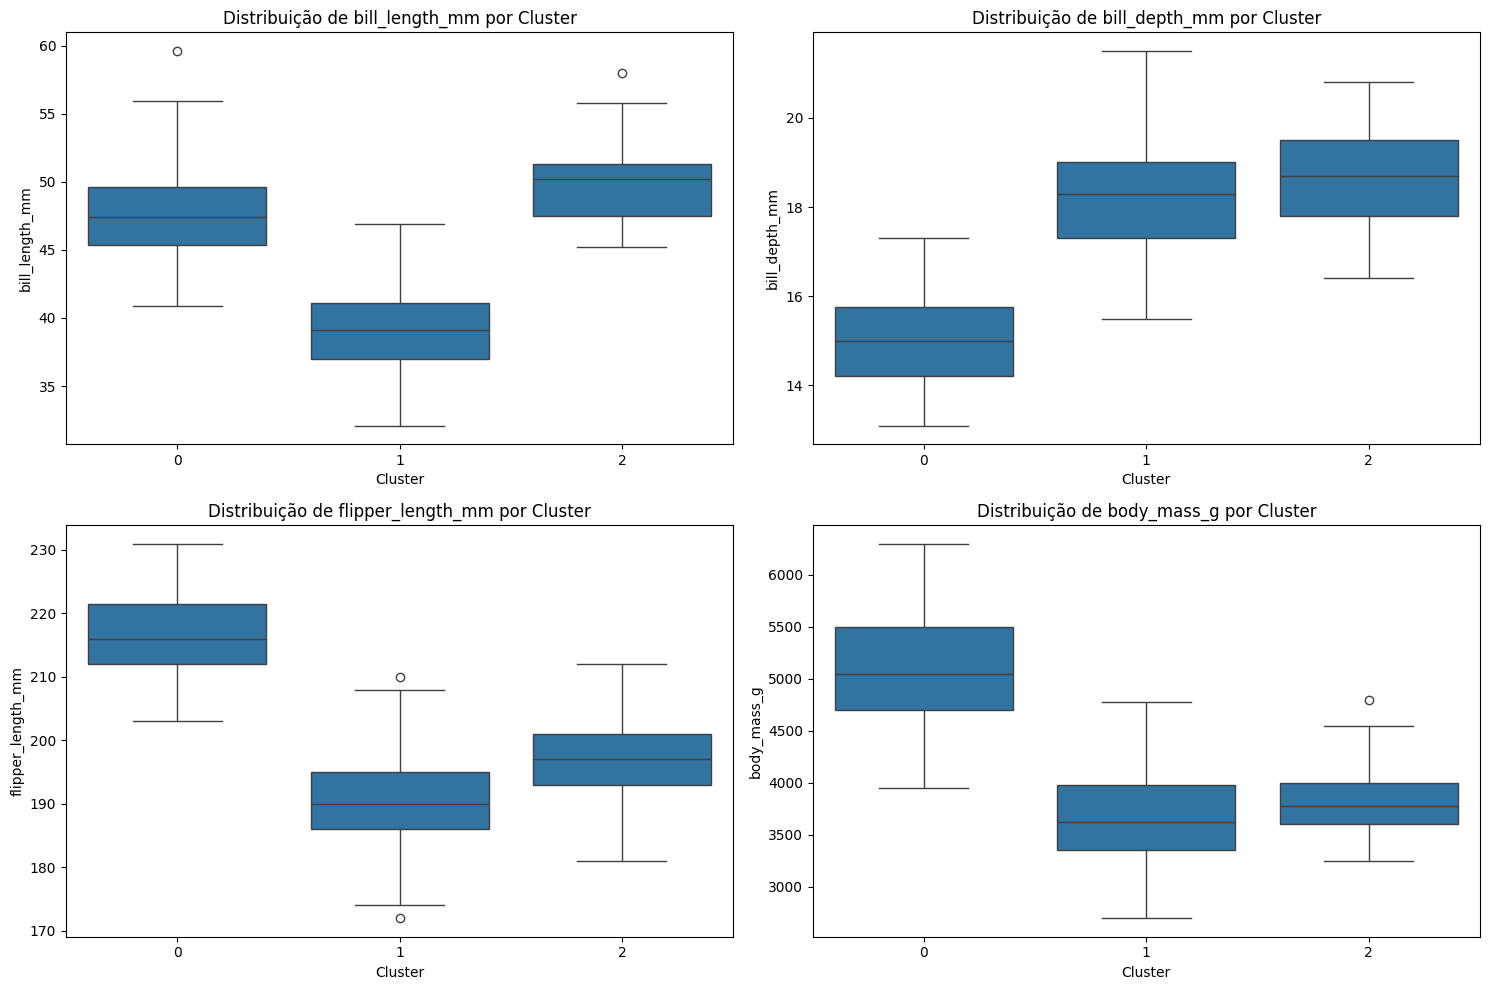

In [15]:
# 2. Descrição das variáveis quantitativas por grupo
for cluster in range(n_clusters):
    print(f"Descrição do Grupo {cluster}:")
    cluster_data = penguins_clean[penguins_clean['Cluster'] == cluster]
    print(cluster_data[quantitative_vars].describe())
    print("\n")

# 3. Visualizações

# Boxplots para cada variável quantitativa por cluster
plt.figure(figsize=(15, 10))
for i, var in enumerate(quantitative_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Cluster', y=var, data=penguins_clean)
    plt.title(f'Distribuição de {var} por Cluster')
plt.tight_layout()
plt.show()

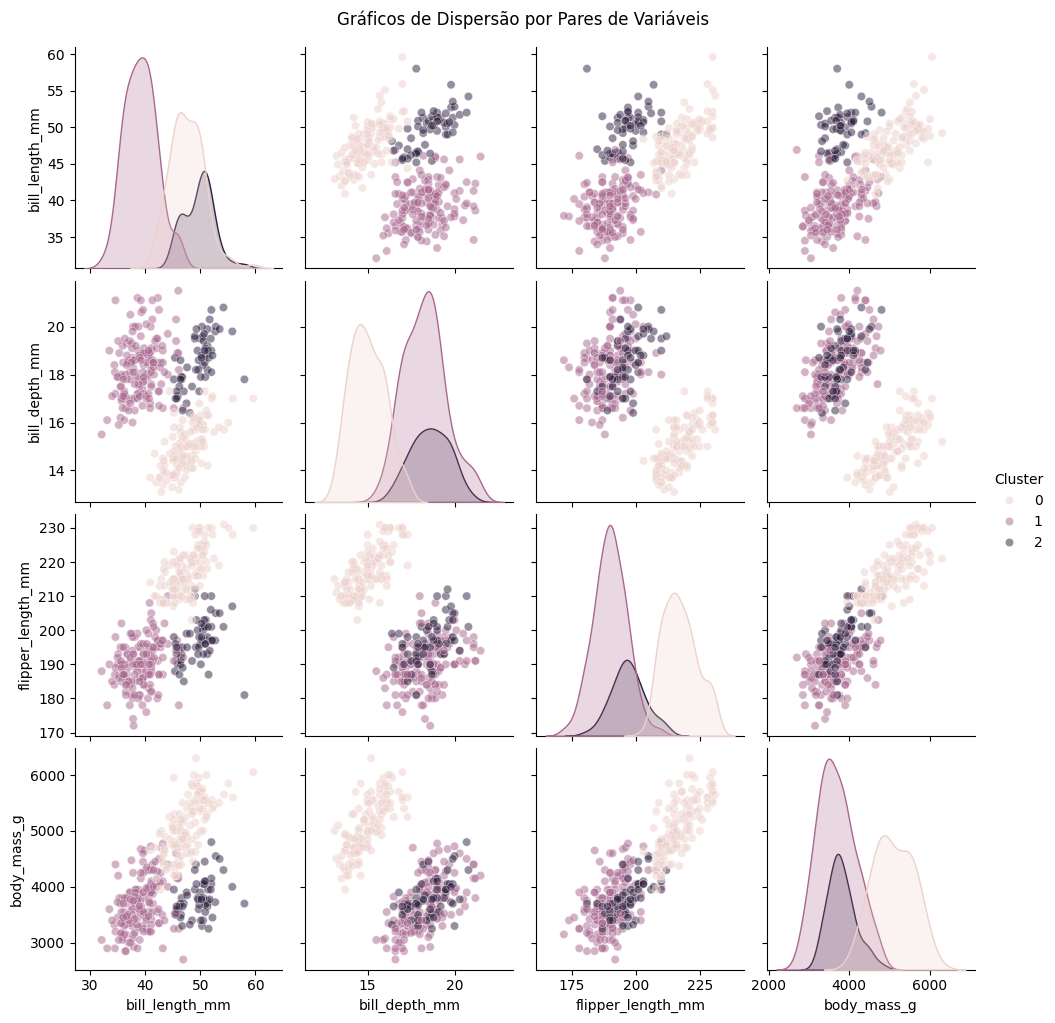

In [16]:
# Gráfico de dispersão com todas as combinações de variáveis
sns.pairplot(penguins_clean, vars=quantitative_vars, hue='Cluster', plot_kws={'alpha': 0.5})
plt.suptitle('Gráficos de Dispersão por Pares de Variáveis', y=1.02)
plt.show()

In [17]:
# 4. Características médias de cada cluster
cluster_means = penguins_clean.groupby('Cluster')[quantitative_vars].mean()
print("Médias das variáveis por cluster:")
print(cluster_means)
print("\n")

Médias das variáveis por cluster:
         bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
Cluster                                                               
0             47.568067      14.996639         217.235294  5092.436975
1             39.191720      18.286624         190.038217  3680.095541
2             49.752632      18.601754         197.105263  3810.087719




In [18]:
# 5. Proporção de espécies em cada cluster
species_prop = species_count.div(species_count.sum(axis=1), axis=0)
print("Proporção de espécies em cada cluster:")
print(species_prop)

Proporção de espécies em cada cluster:
species    Adelie  Chinstrap  Gentoo
Cluster                             
0        0.000000   0.000000     1.0
1        0.929936   0.070064     0.0
2        0.000000   1.000000     0.0


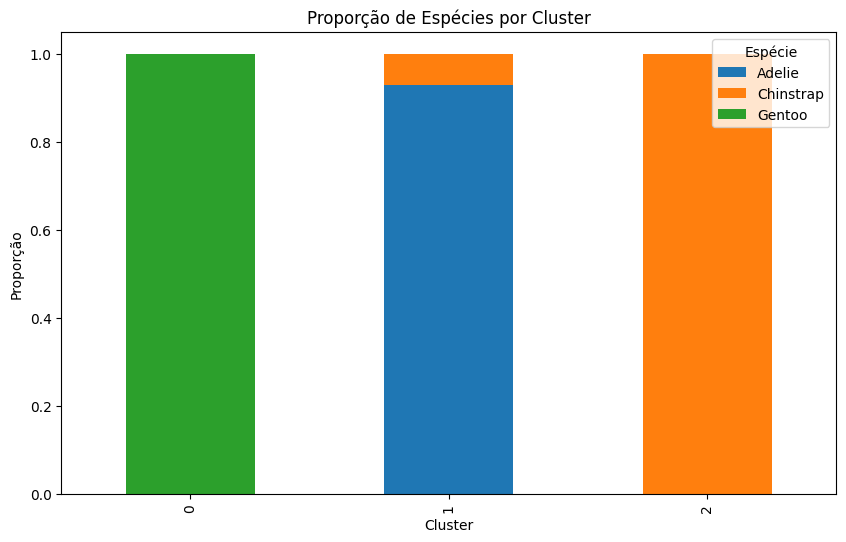

In [19]:
# Visualização da proporção de espécies
species_prop.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proporção de Espécies por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção')
plt.legend(title='Espécie')
plt.show()

In [20]:
# Fazer o agrupamento hierárquico com 4 grupos
n_clusters = 4
clustering = AgglomerativeClustering(n_clusters=n_clusters)
penguins_clean['Cluster'] = clustering.fit_predict(penguins_scaled)


<ipython-input-20-209af9fea1e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean['Cluster'] = clustering.fit_predict(penguins_scaled)


In [21]:
# 1. Contagem de pinguins de cada espécie por grupo
species_count = pd.crosstab(penguins_clean['Cluster'], penguins_clean['species'])
print("Contagem de pinguins de cada espécie por grupo:")
print(species_count)
print("\n")


Contagem de pinguins de cada espécie por grupo:
species  Adelie  Chinstrap  Gentoo
Cluster                           
0           146         11       0
1             0          0      70
2             0         57       0
3             0          0      49




In [22]:
# 2. Contagem de pinguins de cada espécie por sexo e grupo
sex_species_count = pd.crosstab([penguins_clean['Cluster'], penguins_clean['sex']],
                                penguins_clean['species'])
print("Contagem de pinguins de cada espécie por sexo e grupo:")
print(sex_species_count)
print("\n")

Contagem de pinguins de cada espécie por sexo e grupo:
species         Adelie  Chinstrap  Gentoo
Cluster sex                              
0       FEMALE      73         11       0
        MALE        73          0       0
1       FEMALE       0          0       9
        MALE         0          0      61
2       FEMALE       0         23       0
        MALE         0         34       0
3       FEMALE       0          0      49




In [23]:
# 3. Características médias de cada cluster
cluster_means = penguins_clean.groupby('Cluster')[quantitative_vars].mean()
print("Médias das variáveis por cluster:")
print(cluster_means)
print("\n")

Médias das variáveis por cluster:
         bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
Cluster                                                               
0             39.191720      18.286624         190.038217  3680.095541
1             49.260000      15.624286         221.042857  5414.642857
2             49.752632      18.601754         197.105263  3810.087719
3             45.151020      14.100000         211.795918  4632.142857




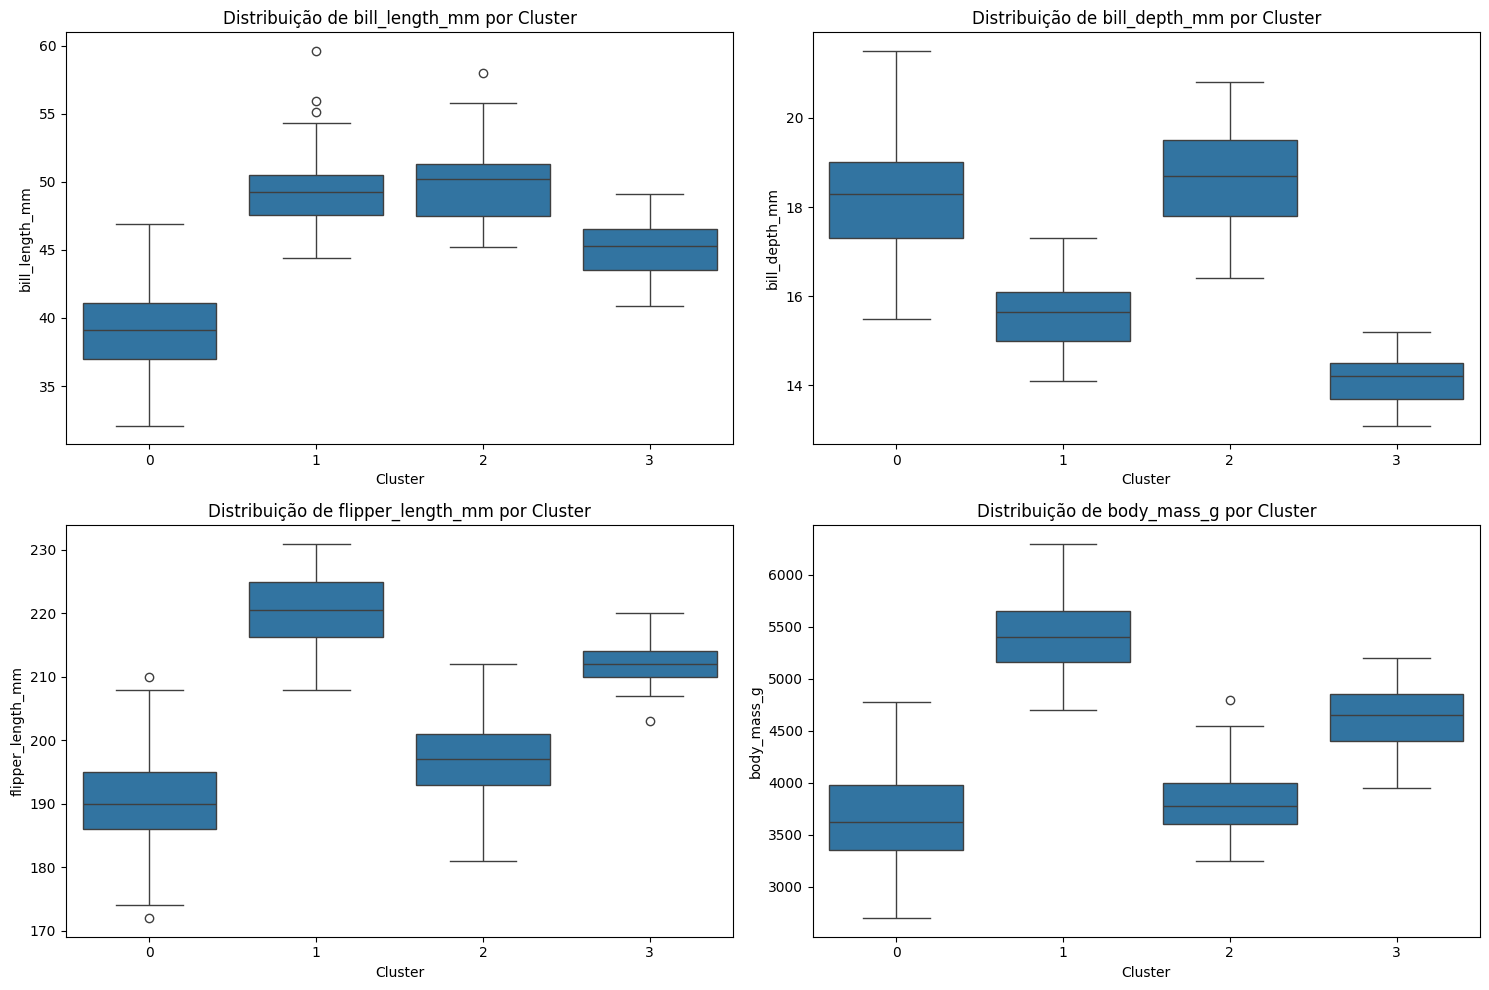

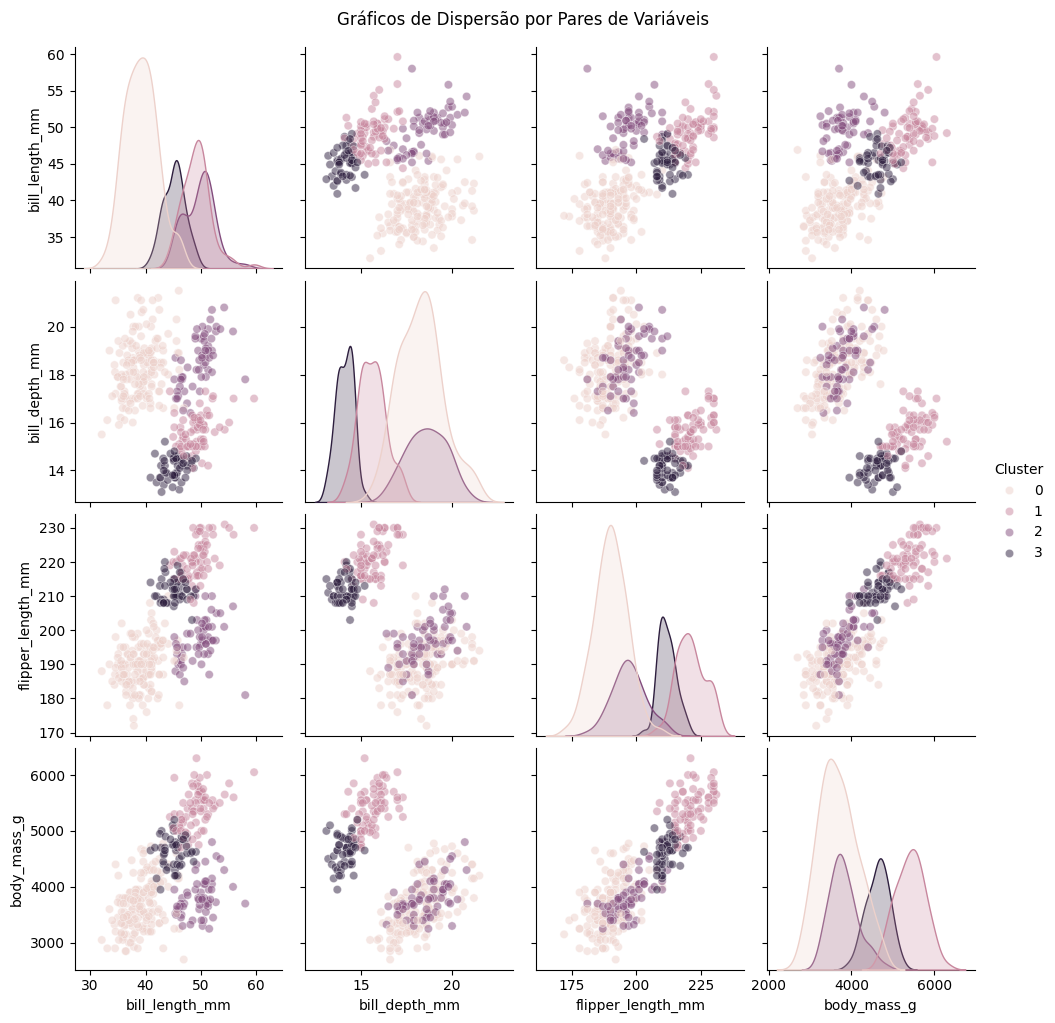

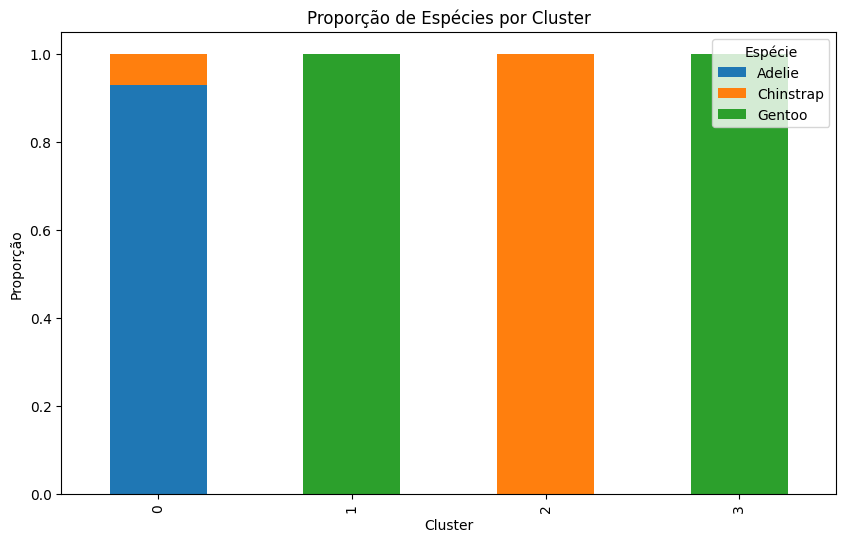

In [24]:
# 4. Visualizações

# Boxplots para cada variável quantitativa por cluster
plt.figure(figsize=(15, 10))
for i, var in enumerate(quantitative_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Cluster', y=var, data=penguins_clean)
    plt.title(f'Distribuição de {var} por Cluster')
plt.tight_layout()
plt.show()

# Gráfico de dispersão com todas as combinações de variáveis
sns.pairplot(penguins_clean, vars=quantitative_vars, hue='Cluster', plot_kws={'alpha': 0.5})
plt.suptitle('Gráficos de Dispersão por Pares de Variáveis', y=1.02)
plt.show()

# Visualização da proporção de espécies
species_prop = species_count.div(species_count.sum(axis=1), axis=0)
species_prop.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proporção de Espécies por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção')
plt.legend(title='Espécie')
plt.show()